In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(readr)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
options(repr.matrix.max.rows = 10)
# Importing both CSV files into R and loading them
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url_sessions <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
players <- read_csv(url_players)
sessions <- read_csv(url_sessions)
players
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17,NA,NA
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,NA,NA
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12


In [4]:
# Tidying up the sessions dataset 
sessions_tidy <- sessions |>
select(hashedEmail, start_time, end_time) |>
filter(na.rm = TRUE)
# Since we only need the average session time per user, let's calculate that.
sessions_tidy <- sessions_tidy |> 
mutate(start_time_numeric = as.numeric(as.POSIXct(start_time, format="%d/%m/%Y  %H:%M"))) |>
mutate(end_time_numeric = as.numeric(as.POSIXct(end_time, format="%d/%m/%Y  %H:%M"))) |>
mutate(session_length = (end_time_numeric - start_time_numeric)/60)
average_session_length <- sessions_tidy |>
group_by(hashedEmail) |>
summarise(average_session_time = mean(session_length, na.rm = TRUE))
# Moving the average_session_length column to the players dataset (SOURCE: https://stat545.com/join-cheatsheet.html - from the "Additional Resources" section of Chapter 3 in the book)
players_merged <- inner_join(players, average_session_length, join_by(hashedEmail))
players_merged

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,average_session_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,74.77778
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA,85.00000
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA,5.00000
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA,50.00000
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA,9.00000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,TRUE,ba24bebe588a34ac546f8559850c65bc90cd9d51b821581bd6e25cff437a1081,0.1,Gabriela,Female,44,NA,NA,11.00000
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,NA,NA,21.00000
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA,5.00000


In [20]:
# Tidying up the players dataset
players_tidy <- players_merged |>
select(experience, hashedEmail, played_hours, gender, age, average_session_time) |>
filter(na.rm = TRUE) |>
relocate(experience, .after = gender) |>
relocate(age, .after = played_hours) |>
arrange(desc(played_hours)) |>
#mutate(gender = recode(gender, "Male" = 1, "Female" = 2, "Non-binary" = 3, "Agender" = 4, "Two-Spirited" = 5, "Other" = 6, "Prefer not to say" = 7)) |>
mutate(gender = case_when(
    gender == "Male" ~ "Male",
    gender == "Female" ~ "Female",
    TRUE ~ "Other")) |>

#combined all other genders into "Other" to make it easier to work with - Michaele

mutate(gender_male = case_when(gender == "Male" ~ 1, gender == "Female" ~ 0, gender == "Other" ~ 0),
        gender_female = case_when(gender == "Male" ~ 0, gender == "Female" ~ 1, gender == "Other" ~ 0),
        gender_other = case_when(gender == "Male" ~ 0, gender == "Female" ~ 0, gender == "Other" ~ 1)) |>

#This is what Eddie said to do with the gender column, and this also means that each gender is its own predictor. I don't know if that will mess up 
#what we are trying to do, but we'll see what we can do, and asbolute worst case senario is we just don't include gender as a predictor - Michaele

mutate(experience = recode(experience, "Beginner" = 1, "Amateur" = 2, "Regular" = 3, "Veteran" = 4, "Pro" = 5))
# mutate(gender = as.numeric((as_factor(gender)))) |>
# mutate(experience = as.numeric((as_factor(experience))))     
players_tidy 

hashedEmail,played_hours,age,gender,experience,average_session_time,gender_male,gender_female,gender_other
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,17,Male,3,66.99087,1,0,0
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,218.1,20,Other,3,150.34043,0,0,1
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,178.2,19,Female,3,80.45578,0,1,0
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,16,Female,2,62.55975,0,1,0
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,56.1,23,Male,2,15.46774,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
a2a0612e9a7da558cbac2ee3c816740324505a69a6e042c94aa1b67731f9ff01,0,18,Male,3,6,1,0,0
2cfed571797b66cc810c32562fc5b0f70b5bec0f5250799245527135bbf9662e,0,16,Male,2,6,1,0,0
bda1905e54b6c745bcced9d59ce655a5bfd03c35cc6abdd8d1610e5c416f79d1,0,17,Male,2,5,1,0,0


In [21]:
# Splitting the data into test and training splits
set.seed(3500) #DO NOT CHANGE
players_split <- initial_split(players_tidy, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)


In [23]:
set.seed(2499) # DO NOT CHANGE  
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
       set_engine("kknn") |>
       set_mode("regression")
players_recipe <- recipe(played_hours ~ age + gender_male + gender_female + gender_other + experience + average_session_time, data = players_training) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)
gridvals <- tibble(neighbors = seq(1,60, by = 3))

players_workflow <- workflow() |>
add_recipe(players_recipe) |>
add_model(players_spec) 

players_results <- players_workflow |>
tune_grid(resamples = players_vfold, grid = gridvals) |>
collect_metrics()

players_min <- players_results |>
filter(.metric == "rmse") |>
slice_min(mean)
players_min

k_min <- players_min |>
        pull(neighbors)

# players_summary <- players_workflow |>
                   # predict(players_testing) |>
                   # bind_cols(players_testing) |>
                   # metrics(truth = played_hours, estimate = .pred)
# players_summary

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
55,rmse,standard,28.84632,5,8.88291,Preprocessor1_Model19


In [24]:
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |> 
       set_engine("kknn") |>
       set_mode("regression")

players_best_fit <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_best_spec) |>
                    fit(data = players_training)
players_summary <- players_best_fit |>
                    predict(players_testing) |>
                    bind_cols(players_testing) |>
                    metrics(truth = played_hours, estimate = .pred)
players_summary

# set.seed(2024) # DO NOT CHANGE 
#players_preds <- players_workflow |>
 #                   predict(players_testing) |>
  #                  bind_cols(players_testing)
#players_plot <- ggplot(players_preds, aes( = age, y = played_hours)) +
 #           geom_point(alpha = 0.4) +
  #          xlab("Age") +
   #         ylab("Total playtime duration") + 
    #        geom_line(data = players_preds, aes(x = age, y = .pred), color = "blue") +
     #       ggtitle("Regression Line") +
      #      theme(text = element_text(size = 20))
#players_plot

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,37.68946387
rsq,standard,0.09510881
mae,standard,15.08357955


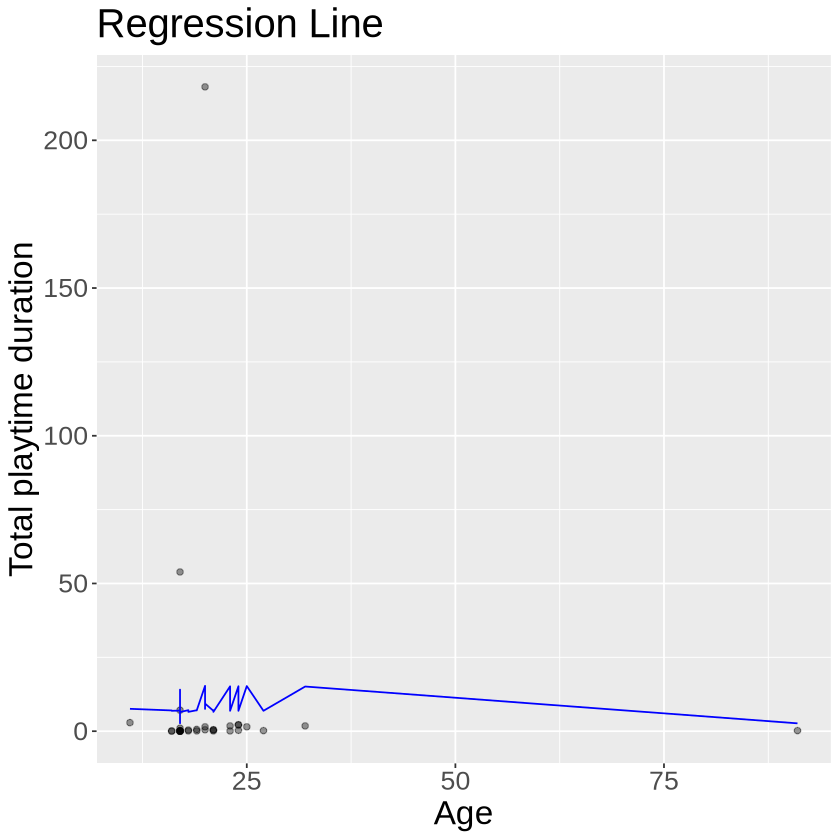

In [25]:
players_preds <- players_best_fit |>
                    predict(players_testing) |>
                    bind_cols(players_testing)
players_plot <- ggplot(players_preds, aes(x = age, y = played_hours)) +
            geom_point(alpha = 0.4) +
            xlab("Age") +
            ylab("Total playtime duration") + 
            geom_line(data = players_preds, aes(x = age, y = .pred), color = "blue") +
            ggtitle("Regression Line") +
            theme(text = element_text(size = 20))
players_plot